In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import seaborn as sns
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Structure

## 1.1 Load data

In [2]:
path = "../input/phys591000-higgs-production"
test = pd.read_csv(path+"/High_Level_Features/Data_Project_Highlevelfeatures_Test.csv")
val = pd.read_csv(path+"/High_Level_Features/Data_Project_Highlevelfeatures_Val.csv")
train = pd.read_csv(path+"/High_Level_Features/Data_Project_Highlevelfeatures_Train.csv")
val_dict = pd.read_csv("/kaggle/input/phys591000-higgs-production/Data_Project_Val/val_dict.csv")

Constituent_Train = pd.read_csv("/kaggle/input/phys591000-higgs-production/Data_Constituent/Data_Constituent_Train.csv")
Constituent_Val = pd.read_csv("/kaggle/input/phys591000-higgs-production/Data_Constituent/Data_Constituent_Val.csv")
Constituent_Test = pd.read_csv("/kaggle/input/phys591000-higgs-production/Data_Constituent/Data_Constituent_Test.csv")


## 1.2 Check shape of data

In [3]:
print("shape of test data:", test.shape)
print("shape of validation data:", val.shape)
print("shape of train data:", train.shape)
print("shape of val_dict:", val_dict.shape)
print("shape of Constituent_Train", Constituent_Train.shape)
print("shape of Constituent_Val", Constituent_Val.shape)
print("shape of Constituent_Test", Constituent_Test.shape)

shape of test data: (40000, 17)
shape of validation data: (40000, 17)
shape of train data: (140000, 17)
shape of val_dict: (40000, 2)
shape of Constituent_Train (5735830, 9)
shape of Constituent_Val (1440447, 9)
shape of Constituent_Test (2055518, 9)


## 1.3 see the feature of each table

In [4]:
test.head()

,higgs_pt,higgs_eta,higgs_m,non_higgs_leading_pt,non_higgs_leading_eta,non_higgs_leading_m,mjj,girth,CIJS,SIJS,DeltaEta,weight,isGGH,isVBF,isVH,isttH,eventindex
0,781.447725,0.387439,126.299896,656.504107,1.047544,64.749568,447.512905,0.025074,0.948285,0.031341,0.601951,0.029486,1,0,0,0,90000
1,638.231833,0.959774,109.170868,526.108608,2.131513,33.226552,808.399577,0.029480,0.961226,0.026822,2.180008,0.029486,1,0,0,0,90001
2,837.906026,1.110231,119.420577,900.160789,-0.079208,142.836308,234.504322,0.060196,0.927437,0.007841,0.510452,0.029486,1,0,0,0,90002
3,550.840781,0.455975,94.715992,501.587553,-1.087573,79.458005,429.960491,0.077034,0.811967,0.118273,0.993909,0.029486,1,0,0,0,90003
4,642.585285,-0.096332,119.001523,850.939408,1.219647,28.274568,1635.284665,0.006788,0.988467,0.010162,2.986985,0.029486,1,0,0,0,90004


In [5]:
val_dict.head()

,Jet_Images,Y
0,Jet_Images_1/x_val_jet_1.npz,3
1,Jet_Images_1/x_val_jet_2.npz,1
2,Jet_Images_1/x_val_jet_3.npz,2
3,Jet_Images_1/x_val_jet_4.npz,2
4,Jet_Images_1/x_val_jet_5.npz,3


In [6]:
Constituent_Test.head()

,pt,eta,phi,e,rel_eta,rel_phi,jet_index,process,label
0,3.06940,0.948859,2.10474,4.560109,-0.537251,1.871171,0,ggF,0
1,3.31317,0.890814,2.07290,4.718948,-0.595296,1.839331,0,ggF,0
2,6.99512,0.829043,2.13673,9.540937,-0.657067,1.903161,0,ggF,0
3,2.38467,0.855601,2.11566,3.315026,-0.630509,1.882091,0,ggF,0
4,6.14630,0.836208,2.13527,8.475448,-0.649902,1.901701,0,ggF,0


# Data visualization

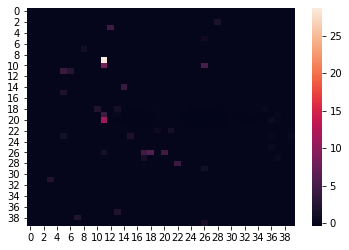

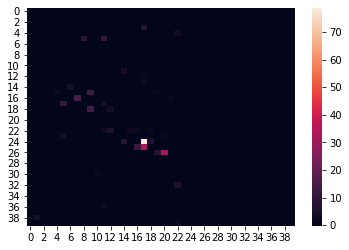

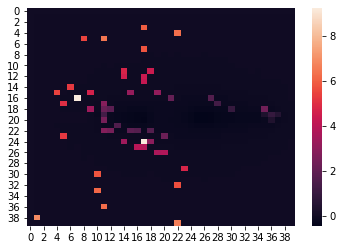

In [7]:
file = np.load('/kaggle/input/phys591000-higgs-production/Data_Project_Val/Jet_Images_1/x_val_jet_1.npz', allow_pickle=True)
image1 = file['jet_images']
for i in range(3):
    plt.figure()
    sns.heatmap(image1[i])
    plt.show()

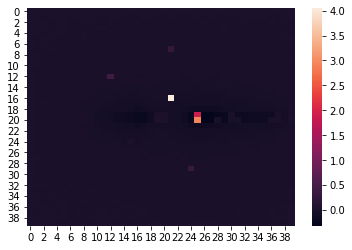

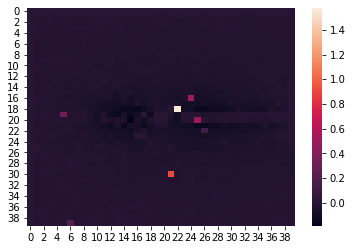

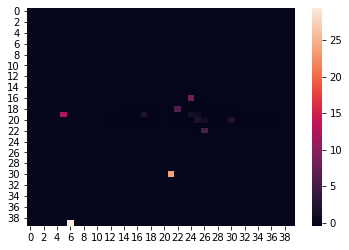

In [13]:
file = np.load('/kaggle/input/phys591000-higgs-production/Data_Project_Val/Jet_Images_1/x_val_jet_2.npz', allow_pickle=True)
image2 = file['jet_images']
for i in range(3):
    plt.figure()
    sns.heatmap(image2[i])
    plt.show()

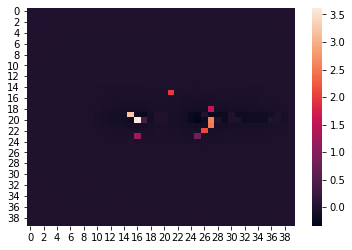

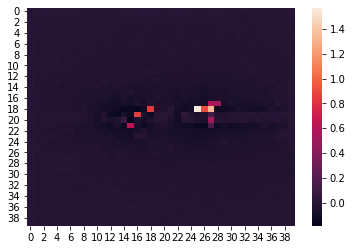

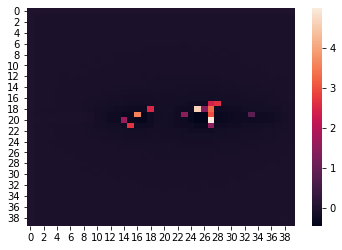

In [14]:
file = np.load('/kaggle/input/phys591000-higgs-production/Data_Project_Val/Jet_Images_1/x_val_jet_3.npz', allow_pickle=True)
image3 = file['jet_images']
for i in range(3):
    plt.figure()
    sns.heatmap(image3[i])
    plt.show()

### Histgram for High level features

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


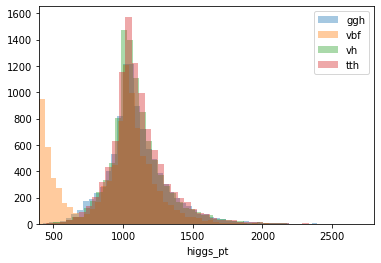

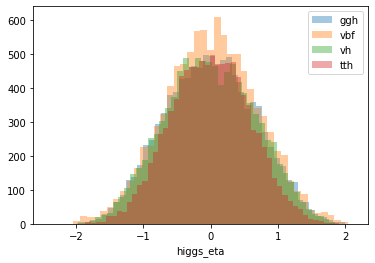

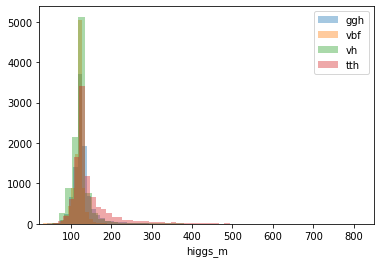

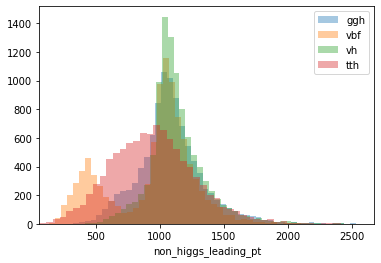

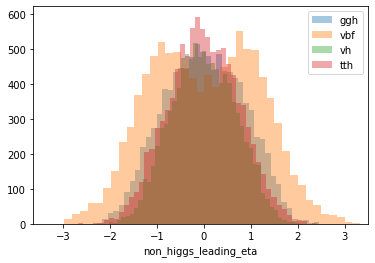

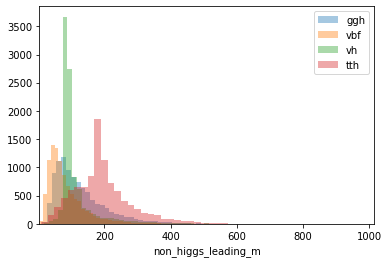

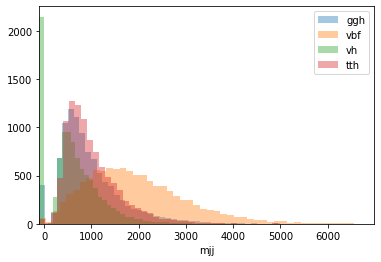

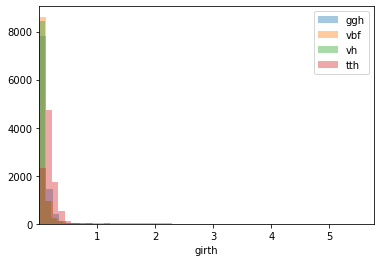

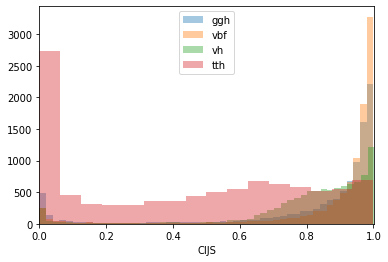

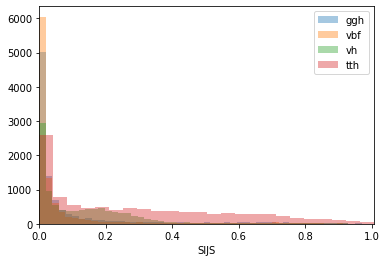

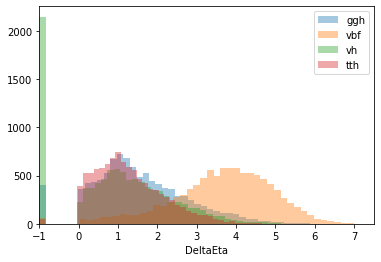

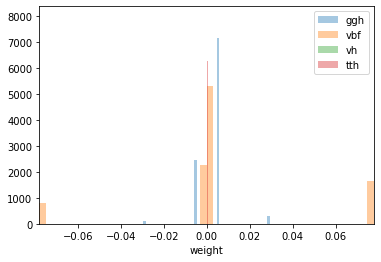

In [8]:
ggh = test[test["isGGH"]==1]
vbf = test[test["isVBF"]==1]
vh = test[test["isVH"]==1]
tth = test[test["isttH"]==1]

for i in range(0,12):
    
    sns.distplot(a=ggh.iloc[:,i], label="ggh", kde=False, norm_hist =0)
    sns.distplot(a=vbf.iloc[:,i], label="vbf", kde=False, norm_hist =0)
    sns.distplot(a=vh.iloc[:,i], label="vh", kde=False, norm_hist =0)
    sns.distplot(a=tth.iloc[:,i], label="tth", kde=False, norm_hist =0)
    
    
    min_tmp = min(np.min(ggh.iloc[:,i]),np.min(vbf.iloc[:,i]), np.min(vh.iloc[:,i]), np.min(tth.iloc[:,i])) 
    max_tmp = max(np.max(ggh.iloc[:,i]),np.max(vbf.iloc[:,i]), np.max(vh.iloc[:,i]), np.max(tth.iloc[:,i])) 
    
    plt.xlim(min_tmp,max_tmp)

    plt.legend()
    plt.show()

## Histgram for low level feature

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


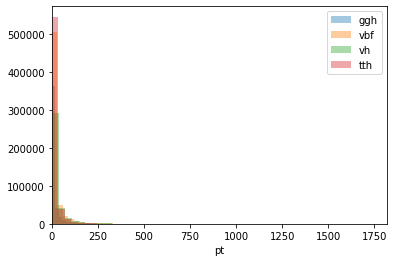

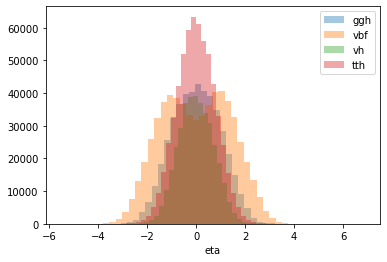

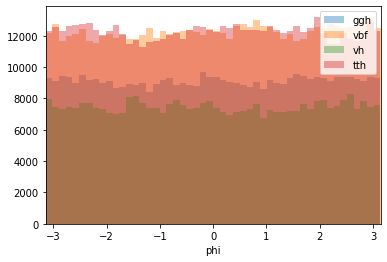

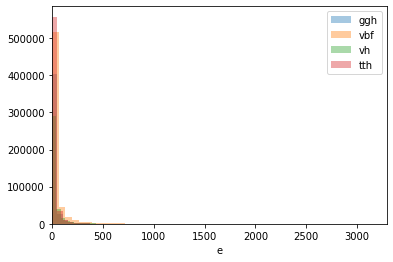

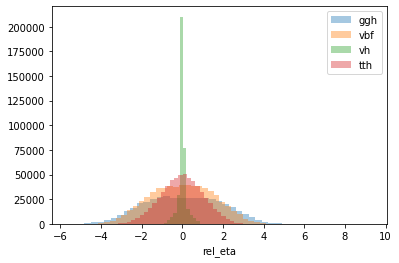

In [9]:
ggh = Constituent_Test[Constituent_Test["label"]==0]
vbf = Constituent_Test[Constituent_Test["label"]==1]
vh = Constituent_Test[Constituent_Test["label"]==2]
tth = Constituent_Test[Constituent_Test["label"]==3]

for i in range(0,5):
    
    sns.distplot(a=ggh.iloc[:,i], label="ggh", kde=False, norm_hist =0)
    sns.distplot(a=vbf.iloc[:,i], label="vbf", kde=False, norm_hist =0)
    sns.distplot(a=vh.iloc[:,i], label="vh", kde=False, norm_hist =0)
    sns.distplot(a=tth.iloc[:,i], label="tth", kde=False, norm_hist =0)
    
    
    min_tmp = min(np.min(ggh.iloc[:,i]),np.min(vbf.iloc[:,i]), np.min(vh.iloc[:,i]), np.min(tth.iloc[:,i])) 
    max_tmp = max(np.max(ggh.iloc[:,i]),np.max(vbf.iloc[:,i]), np.max(vh.iloc[:,i]), np.max(tth.iloc[:,i])) 
    
    plt.xlim(min_tmp,max_tmp)

    plt.legend()
    plt.show()

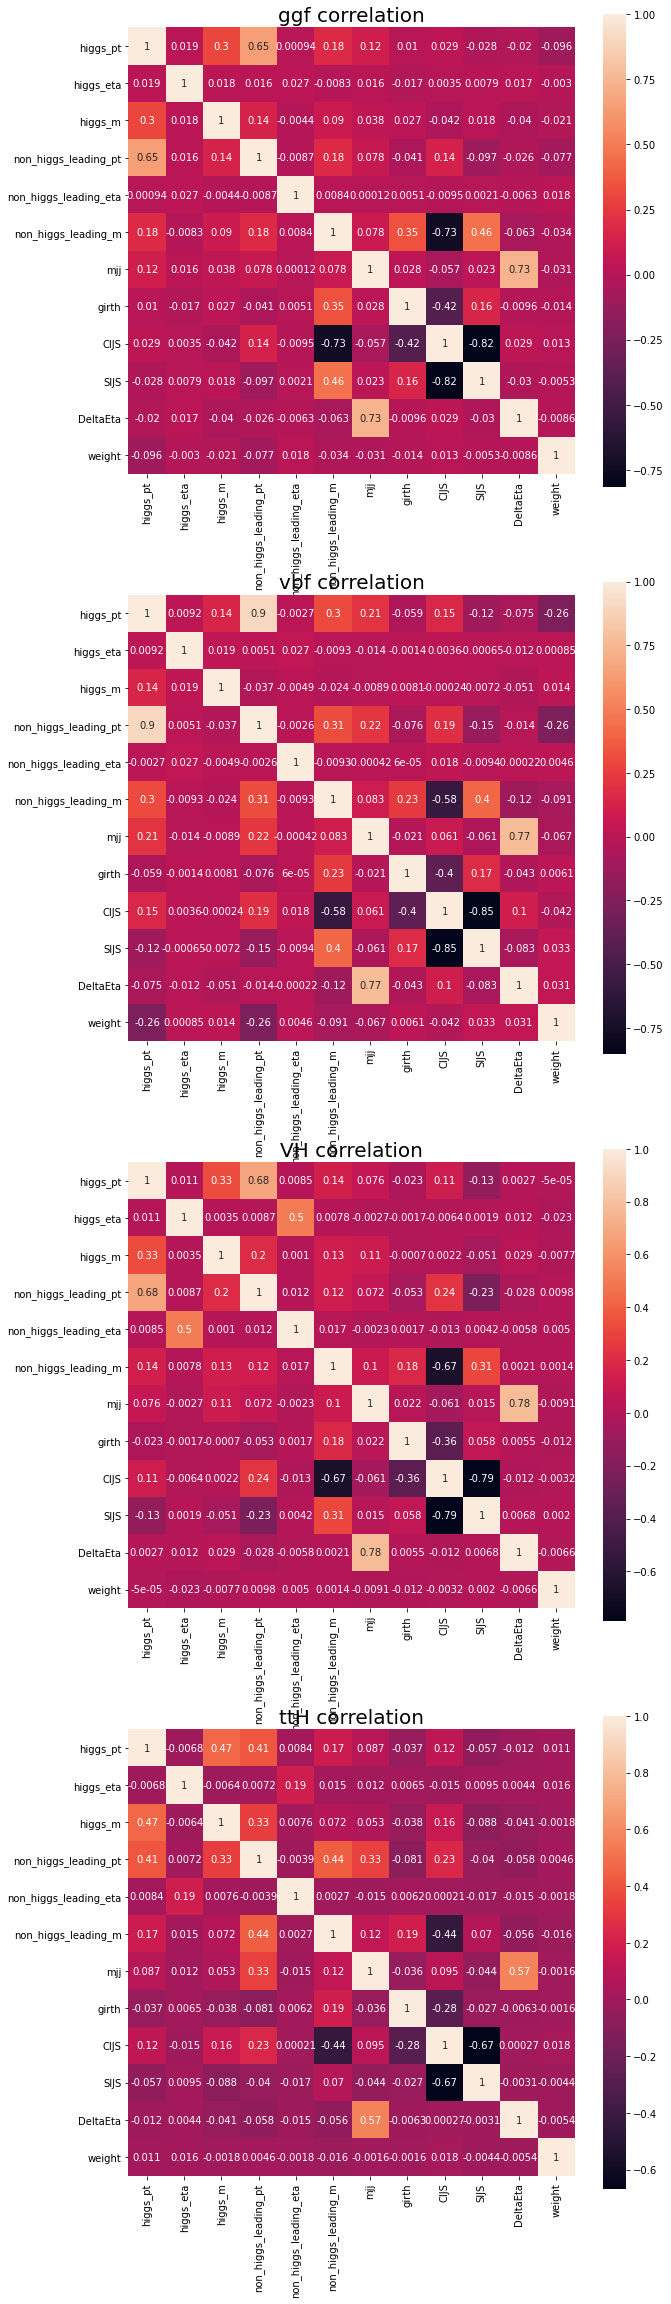

In [12]:
ggf = test[test["isGGH"]==1]
vbf = test[test["isVBF"]==1]
vh = test[test["isVH"]==1]
tth = test[test["isttH"]==1]

features = ['higgs_pt', 'higgs_eta', 'higgs_m', 'non_higgs_leading_pt' ,
            'non_higgs_leading_eta', 'non_higgs_leading_m','mjj',
            'girth','CIJS','SIJS','DeltaEta','weight']

ggf_corr = ggf[features].corr()
vbf_corr = vbf[features].corr()
vh_corr = vh[features].corr()
tth_corr = tth[features].corr()

fig, ax = plt.subplots(4, 1, figsize=(10, 40))

ax[0].set_title('ggf correlation', fontsize=20)
sns.heatmap(data=ggf_corr, square=True, annot=True, ax=ax[0])

ax[1].set_title('vbf correlation', fontsize=20)
sns.heatmap(data=vbf_corr, square=True, annot=True, ax=ax[1])

ax[2].set_title('VH correlation', fontsize=20)
sns.heatmap(data=vh_corr, square=True, annot=True, ax=ax[2])

ax[3].set_title('ttH correlation', fontsize=20)
sns.heatmap(data=tth_corr, square=True, annot=True, ax=ax[3])
plt.show()

# Discussion

From part 1, we can see that there are high level feature datas in "Data_Project_Highlevelfeatures_XXX.csv" and low level feature data in "Data_Constituent_XXX.csv". To observe the shape of data, we get the number of feature in each table. Each event is labeled by different process: ggF, VBF, VH, ttH. We want to find out which feature can help us classify each process, so in part 2, first we want to know what the image looks like; thus, we show the image. However, it can't help us to find out anything, so we make the histgram of each feature and correlation matrics, to find the correlation between them. 


In the correlation matrix, it is hard to find the difference between different process.


Therefore, to observe the high level feature histgram, it shows better seperation to classify the process than low level feature, like "non higgs leading m" and "non higgs leading pt". When we do classification, we can choose them to seperate the process. 

